In [30]:
import PIL
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
import os

In [31]:
# Get label list from directory
def get_labels(root):
    dataset_dir = root
    labels = []
    for sub_folder in os.listdir(dataset_dir):
        sub_folder_files = os.listdir(os.path.join(dataset_dir, sub_folder))
        for i, filename in enumerate(sub_folder_files):
            labels.append(filename)
        break
    return labels


root = './tourism_destination_2/tourism_destination/'
labels_ori = get_labels(root)


def create_labels_from_filenames(dataset_path):
    # List all files in the dataset directory
    file_names = os.listdir(dataset_path)

    labels = []
    for file_name in file_names:
        if file_name.endswith(".jpg"):
            # Remove the file extension to get the label
            label = os.path.splitext(file_name)[0]
            labels.append(label)

    return labels


# Example usage:
dataset_path = "./tourism_destination_2/testing_image/"
labels = create_labels_from_filenames(dataset_path)

# Print the labels
# print(labels)


def check_word_in_another_word(word, another_word):
    if word.lower() in another_word.lower():
        return True
    else:
        return False


y_labels = []
for i in range(len(labels)):
    for j in range(len(labels_ori)):
        if check_word_in_another_word(labels_ori[j], labels[i]):
            # y_labels.append(labels_ori[j])
            y_labels.append(j)

# Print the filtered labels
print(len(y_labels))

275


In [32]:
root = './tourism_destination_2/tourism_destination/'
class_labels = get_labels(root)  # Replace with your own class labels

In [33]:
model = load_model("./models/model7.h5")

In [34]:
# Load and preprocess the test dataset

test_labels = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15]


test_images_dir = './tourism_destination_2/testing_image/'

# List all image files in the directory
image_files = os.listdir(test_images_dir)
images = []

for image_file in image_files:
    # Load and preprocess the image
    image_path = os.path.join(test_images_dir, image_file)
    image = PIL.Image.open(image_path)
    image = image.resize((150, 150))  # Adjust the size according to your model's input shape
    image = np.array(image) / 255.0  # Normalize the image
    # image = np.expand_dims(image, axis=-1)  # Add a batch dimension

    images.append(image)

# Convert the test_images and test_labels to numpy arrays
test_images = np.array(images)
test_labels = np.array(test_labels)
num_classes = 16  # Replace with the actual number of classes
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)


results = model.evaluate(test_images, test_labels)
print("Loss:", results[0])
print("Accuracy:", results[1])


9/9 [==============================] - 1s 105ms/step - loss: 0.2102 - accuracy: 0.9636
Loss: 0.2102116197347641
Accuracy: 0.9636363387107849


9/9 [==============================] - 1s 156ms/step


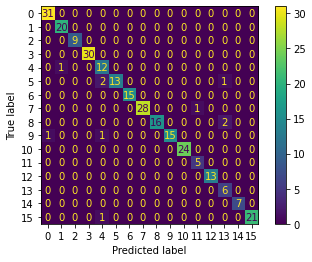

Confusion Matrix:
[[31  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0 20  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 12  2  0  0  0  1  0  0  0  0  0  1]
 [ 0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  5  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 13  0  0  0]
 [ 0  0  0  0  0  1  0  0  2  0  0  0  0  6  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 21]]


In [67]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming you have the predicted labels and true labels
predicted_labels = model.predict(test_images)
predicted_labels = np.argmax(predicted_labels, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Create the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)
# tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
# clf = SVC(random_state=0)
# clf.fit(predicted_labels, y_train)
# SVC(random_state=0)
# y_pred = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(
predicted_labels, true_labels)

plt.show()

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)

In [36]:
import numpy as np
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

# Calculate precision
precision = precision_score(true_labels, predicted_labels, average='macro')

# Calculate recall
recall = recall_score(true_labels, predicted_labels, average='macro')

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels, average='macro')

# Print F1 Score, precision and recall
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)


F1 Score: 0.9519276485834726
Precision: 0.9641800905666904
Recall: 0.9481956845238095
